# SEL0620 - Controle Digital

## Tutorial da Biblioteca de Controle -- Parte 2

Este tutorial mostra alguns exemplos do uso da [biblioteca de controle para Python](https://python-control.readthedocs.io/).

### Preparação do Ambiente Colab

O comando a seguir instala a biblioteca de controle no ambiente do Colab

In [1]:
# !pip install slycot -- quiet  # biblioteca opcional
!pip install control --quiet

     |████████████████████████████████| 339 kB 7.6 MB/s 


Carrega as bibiotecas 

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import control as ct
from control.matlab import * #Esta opção permite que se use comandos disponíveis que são equivalentes aos comandos do Matlab

### Função de transferência

Considere uma função de trânsferência de primeira ordem:

$G(s) = K\frac{1}{\tau s + 1}$

onde $\tau$ é a constante de tempo, e $K$ é o ganho do sistema.

A seguinte sequencia de código pode ser usada para representar $G(s)$ utilizando o comando [`tf`](https://python-control.readthedocs.io/en/0.9.0/generated/control.tf.html#control.tf) da biblioteca de controle em Python:

In [3]:
#Variável 's'
s = tf('s')

#Parâmetros do sistema
tau = 0.1
K = 5

#Função de transferência
G1 = K/(tau*s + 1) # utilizando a definição da variável s que foi feita
G2 = tf([K],[tau, 1]) #utilizando um vetor/lista com os coeficientes do polinômio do numerador e do denominador

#Mostra a função de transferência
print('G(s) = ', G1)
print('G(s) = ', G2)


G(s) =  
    5
---------
0.1 s + 1

G(s) =  
    5
---------
0.1 s + 1



### Função de Transferência Discreta

O comando [`sample`](https://python-control.readthedocs.io/en/0.9.0/generated/control.TransferFunction.html), ou [`c2d`](https://python-control.readthedocs.io/en/0.9.0/generated/control.matlab.c2d.html#control.matlab.c2d), pode ser usado para converter um sistema contínuo em discreto. O método de discretização pode ser escolhido, sendo que o padrão é discretização com retentor de ordem zero (zoh - *zero order holder*).

In [7]:
Ta = 0.1 #Periodo de amostragem
G1d = G1.sample(Ta,'zoh')
print(G1d)

G2d = c2d(G1,Ta,'zoh')
print(G2d)


  3.161
----------
z - 0.3679

dt = 0.1


  3.161
----------
z - 0.3679

dt = 0.1



### Resposta transitória 

O comando [`step`](https://python-control.readthedocs.io/en/0.9.0/generated/control.matlab.step.html) é utilizado para obter a resposta do sistema contínuo ou discreto para uma entrada degrau.

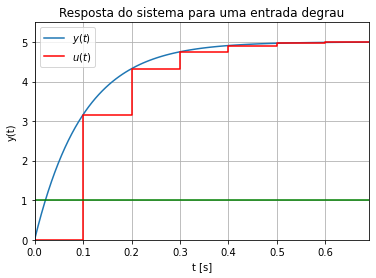

In [13]:
# Resposta ao degrau unitário (continuo):
y, t = step(G1)
plt.plot(t, y)

# Resposta ao degrau unitário (discreto):
yd, td = step(G1d)
plt.step(td, yd,'r',where='post') # veja a documentação do pyplot.step e exemplos

# Para mostrar a entraga degrau no gráfico:
A=1 # Amplitude do degrau
u = A*np.ones(np.shape(y))
plt.plot(t, u,'g')

plt.ylabel('y(t)')
plt.xlabel('t [s]')
plt.title("Resposta do sistema para uma entrada degrau")
plt.legend(['$y(t)$','$u(t)$'])
plt.grid(True)
plt.axis([0,t[-1],0,1.1*y[-1]])
plt.show(block=False)

Observe que para o exemplo, o sistema $G(s)$ possui um ganho DC, $K=5$, e por essa razão, a resposta estácionária do sistema é K vezes a amplitude do degrau. Para $u(t) = 1(t)$, $U(s) = 1/s$, e $y_{ss} = \lim_{t\rightarrow \infty} y(t) = \lim_{s\rightarrow 0} sY(s) = K$.

Observe também que para o sistema de primeira ordem, a resposta do sistema para uma entrada degrau unitária é $y(t) = 0.632K$ para $t=\tau$.

In [14]:
y_i, t_i = step(G1,tau)
print('Para t=',t_i[-1],'y/K=',y_i[-1]/K)

Para t= 0.1 y/K= 0.632120558828557
